Ćwiczenie:

- pobierz zbiór danych Rain in Australia (załączony do tej instrukcji)

- usuń kolumny mające więcej niż 30% brakujących wartości oraz kolumnę 'Risk-MM'

- dokonaj imputacji brakujących wartości zakładając że są one MCAR (Missing Completely At Random), tzn. zmienne kategoryczne należy zastąpić dominantą (najczęściej występującą w kolumnie wartością) a numeryczne medianą (wartością środkową w rosnąco posortowanej kolumnie)

- obetnij obserwacje odstające więcej niż 1.5 rozstępu ćwiartkowego

- znormalizuj (numeryczne) i zakoduj (kategoryczne) dane

- wykorzystując sklearn.linear_model.LogisticRegression, dla każdego z regionów naucz model przewidujący jutrzejsza pogodę 'RainTomorrow'

- sprawdź który z modeli najskuteczniej przewiduje pogodę w skali całego kraju (dla każdego klasyfikatora zbiór testowy powinien być próbkowany z podzbiorów testowych dla wszystkich regionów)

- sprawdź czy wybrany model miał najwyższe accuracy na własnym zbiorze testowym spośród wszystkich klasyfikatorów

- porównaj najlepszy klasyfikator z "klasyfikatorem" zawsze wybierającym dominującą wartość w zbiorze

- dla najlepszego klasyfikatora wyświetl confusion matrix

Przy wykonywaniu zadania należy pamiętać o stratyfikacji.

Import bibliotek

In [235]:
import pandas as pd
import numpy as np

Wczytanie bazy danych

In [236]:
rain = pd.read_csv('weatherAUS.csv')

Usunięcie kolumny Risk-MM

In [237]:
rain =rain.drop(['RISK_MM'],axis=1)

Usunięcie kolumn, w których brakuje więcej niż 30% wartości

In [238]:
raindf = rain.drop(rain.loc[:,list((100*(rain.isnull().sum()/len(rain.index))>30))].columns, 1)
raindf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Sprawdzenie, które kolumny zawierają nullowe wartości:

In [239]:
columns = []
for col in raindf.columns: 
    columns.append(col) 

In [240]:
for columna in columns: 
    print(raindf[columna].isnull().sum())

0
0
637
322
1406
9330
9270
10013
3778
1348
2630
1774
3610
14014
13981
904
2726
1406
0


In [241]:
kolumny = columns[2:-1]
kolumny

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [242]:
dominanty= []
for kolumna in kolumny:
    a = raindf[kolumna].value_counts().nlargest(1)
    dominanty.append(a)

In [243]:
dominanty

[9.6    883
 Name: MinTemp, dtype: int64,
 20.0    871
 Name: MaxTemp, dtype: int64,
 0.0    90275
 Name: Rainfall, dtype: int64,
 W    9780
 Name: WindGustDir, dtype: int64,
 35.0    9070
 Name: WindGustSpeed, dtype: int64,
 N    11393
 Name: WindDir9am, dtype: int64,
 SE    10663
 Name: WindDir3pm, dtype: int64,
 9.0    13400
 Name: WindSpeed9am, dtype: int64,
 13.0    12338
 Name: WindSpeed3pm, dtype: int64,
 99.0    3350
 Name: Humidity9am, dtype: int64,
 52.0    2699
 Name: Humidity3pm, dtype: int64,
 1016.4    804
 Name: Pressure9am, dtype: int64,
 1015.5    773
 Name: Pressure3pm, dtype: int64,
 17.0    901
 Name: Temp9am, dtype: int64,
 20.0    871
 Name: Temp3pm, dtype: int64,
 No    109332
 Name: RainToday, dtype: int64]

In [244]:
raindf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Uzupełnienie zmiennych kategorycznych dominantami

In [245]:
raindf['RainToday'].fillna('No', inplace = True)
raindf['WindDir3pm'].fillna('SE', inplace = True)
raindf['WindDir9am'].fillna('N', inplace = True)
raindf['WindGustDir'].fillna('W', inplace = True)

Uzupełnienie zmiennych numerycznych medianą 

In [246]:
raindf.fillna(raindf.median(),inplace = True)

Sprawdzenie czy zostały jeszcze wartości Nan

In [247]:
columns = []
for col in raindf.columns: 
    columns.append(col) 
for columna in columns: 
    print(raindf[columna].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


obcięcie obserwacji odstających więcej niż 1.5 rozstępu ćwiartkowego

In [248]:
newdf = raindf.select_dtypes(include='float64')
columns_n = []
for col in newdf.columns: 
    columns_n.append(col) 

In [249]:
columns_n

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [250]:
for kolumna in columns_n:
    Q1 = raindf[kolumna].quantile(0.25)
    Q3 = raindf[kolumna].quantile(0.75)
    IQR = Q3 - Q1
    A = Q1 - 1.5 * IQR 
    B = Q3 + 1.5 * IQR
    mask = raindf[kolumna].between(A, B, inclusive=True)
    mask = mask.to_numpy()
    for i in range(len(mask)):
        if (mask[i] == False):
            try:
                raindf = raindf.drop([i], axis=0)   
            except:
                pass

In [251]:
raindf.shape

(103893, 19)

In [252]:
raindf_zapasowa = raindf 

znormalizuj (numeryczne) i zakoduj (kategoryczne) dane

normalizacja za pomocą średniej

In [253]:
for kolumna in columns_n:
    raindf[kolumna] = (raindf[kolumna]-raindf[kolumna].mean())/raindf[kolumna].std()

In [254]:
raindf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,0.187310,-0.071111,-0.205977,W,0.316697,W,WNW,0.678885,0.628341,0.137185,-1.394779,-1.472117,-1.212802,-0.027295,-0.006032,No,No
1,2008-12-02,Albury,-0.751807,0.239266,-0.278611,WNW,0.316697,NNW,WSW,-1.132443,0.397712,-1.272170,-1.249242,-1.043166,-1.108347,0.019103,0.358680,No,No
2,2008-12-03,Albury,0.109050,0.323914,-0.278611,WSW,0.469017,W,WSW,0.565677,0.858969,-1.585360,-1.006681,-1.486908,-0.974047,0.606815,0.198207,No,No
3,2008-12-04,Albury,-0.470072,0.648400,-0.278611,NE,-1.206504,SE,E,-0.339987,-1.101373,-1.219972,-1.685852,-0.007767,-0.362237,0.158298,0.679625,No,No
4,2008-12-05,Albury,0.829040,1.255046,-0.157554,W,0.088217,ENE,NW,-0.792819,0.167084,0.711366,-0.861144,-1.013583,-1.376947,0.111900,1.146456,No,No


Kodowanie danych kategorycznych

In [257]:
d2 = pd.get_dummies(raindf['WindDir3pm'])
d3 = pd.get_dummies(raindf['WindDir9am'])
d4 = pd.get_dummies(raindf['WindGustDir'])

In [255]:
raindf['RainToday'] = raindf['RainToday'].map({'Yes': 1, 'No': 0})

raindf['RainTomorrow'] = raindf['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [256]:
raindf['RainToday']

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainToday, Length: 103893, dtype: int64

In [258]:
raindf = pd.concat([raindf,d2,d3,d4], axis =1)

In [259]:
raindf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,Albury,0.187310,-0.071111,-0.205977,W,0.316697,W,WNW,0.678885,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,-0.751807,0.239266,-0.278611,WNW,0.316697,NNW,WSW,-1.132443,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,0.109050,0.323914,-0.278611,WSW,0.469017,W,WSW,0.565677,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,-0.470072,0.648400,-0.278611,NE,-1.206504,SE,E,-0.339987,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,0.829040,1.255046,-0.157554,W,0.088217,ENE,NW,-0.792819,...,0,0,0,0,0,0,0,1,0,0


In [260]:
raindf['Date'] = pd.to_datetime(raindf['Date'])

In [261]:
raindf.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,2008-12-01,Albury,0.187310,-0.071111,-0.205977,W,0.316697,W,WNW,0.678885,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,Albury,-0.751807,0.239266,-0.278611,WNW,0.316697,NNW,WSW,-1.132443,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,Albury,0.109050,0.323914,-0.278611,WSW,0.469017,W,WSW,0.565677,...,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,-0.470072,0.648400,-0.278611,NE,-1.206504,SE,E,-0.339987,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,0.829040,1.255046,-0.157554,W,0.088217,ENE,NW,-0.792819,...,0,0,0,0,0,0,0,1,0,0


wykorzystując sklearn.linear_model.LogisticRegression, dla każdego z regionów naucz model przewidujący jutrzejsza pogodę 'RainTomorrow'

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import operator

In [263]:
lokalizacje = pd.unique(raindf['Location'])

In [273]:
lokalizacje

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

Regresja logistyczna

Dla wszystkich lokazlizacji

Albury
Accuracy:  0.9434782608695652


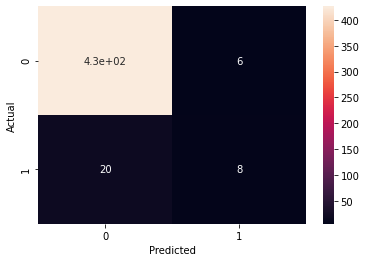

BadgerysCreek
Accuracy:  0.8954248366013072


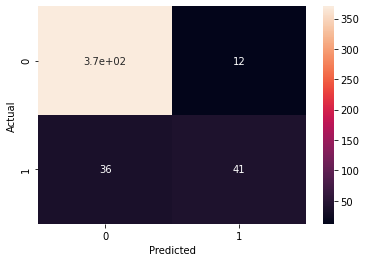

Cobar
Accuracy:  0.9195171026156942


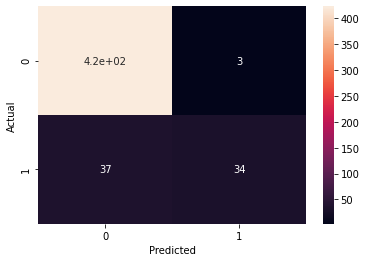

CoffsHarbour
Accuracy:  0.8048192771084337


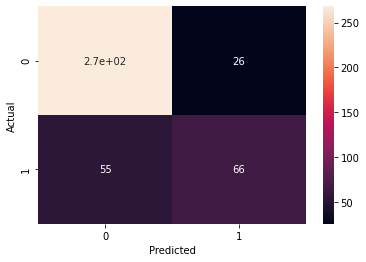

Moree
Accuracy:  0.9055793991416309


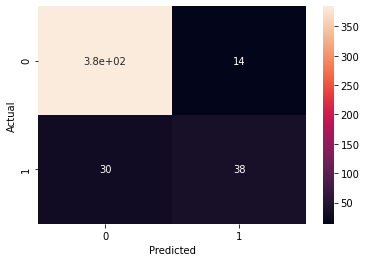

Newcastle
Accuracy:  0.7885572139303483


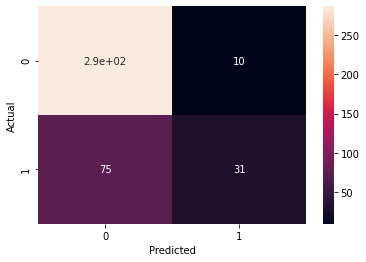

NorahHead
Accuracy:  0.8033175355450237


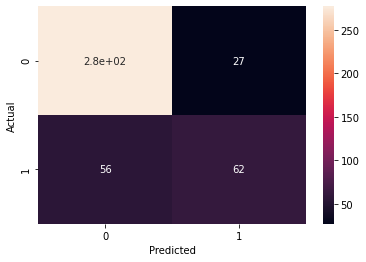

NorfolkIsland
Accuracy:  0.78239608801956


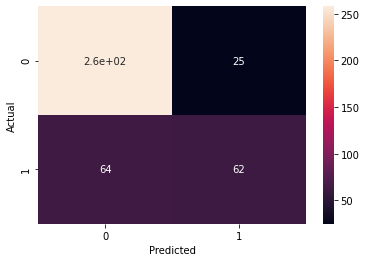

Penrith
Accuracy:  0.9086651053864169


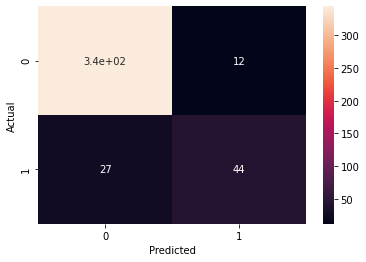

Richmond
Accuracy:  0.8641686182669789


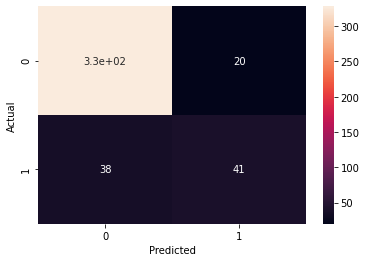

Sydney
Accuracy:  0.817351598173516


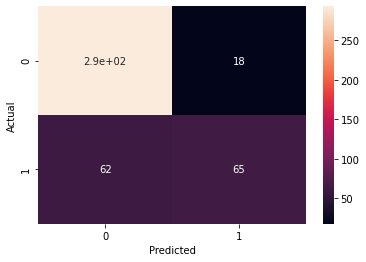

SydneyAirport
Accuracy:  0.844559585492228


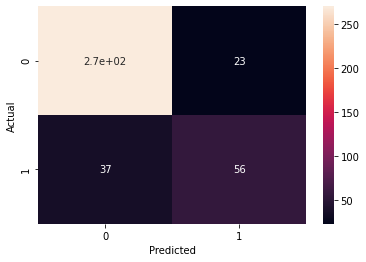

WaggaWagga
Accuracy:  0.8901601830663616


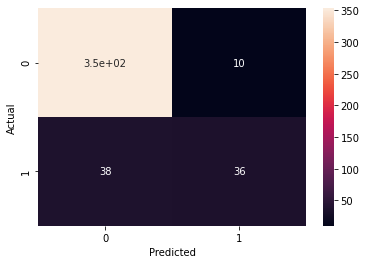

Williamtown
Accuracy:  0.838150289017341


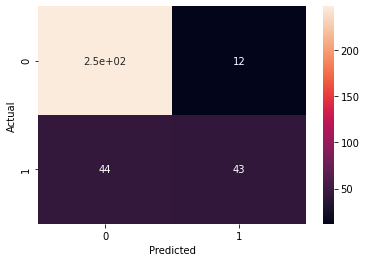

Wollongong
Accuracy:  0.8354755784061697


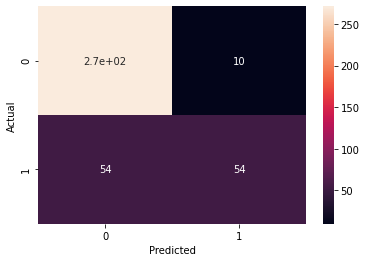

Canberra
Accuracy:  0.848421052631579


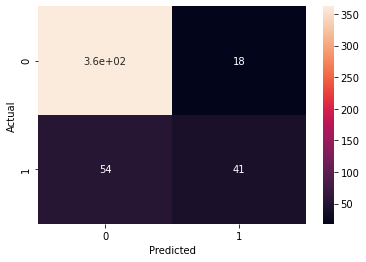

Tuggeranong
Accuracy:  0.9041095890410958


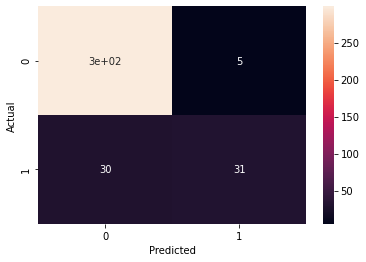

MountGinini
Accuracy:  0.8095238095238095


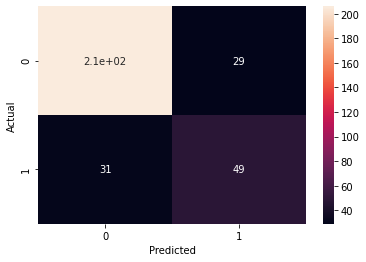

Ballarat
Accuracy:  0.829683698296837


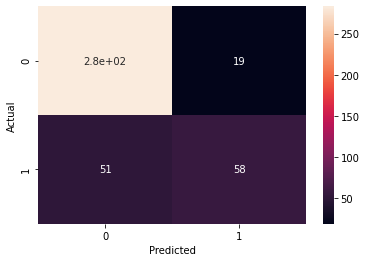

Bendigo
Accuracy:  0.8952164009111617


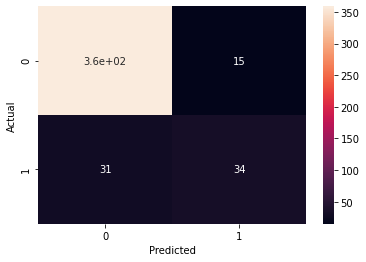

Sale
Accuracy:  0.8047722342733189


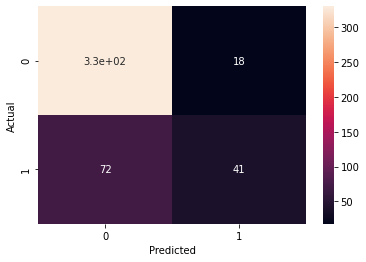

MelbourneAirport
Accuracy:  0.8273684210526315


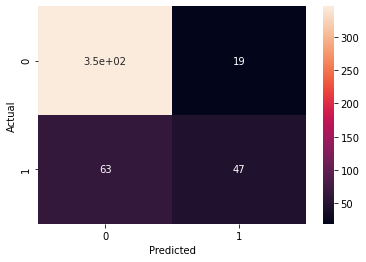

Melbourne
Accuracy:  0.8051575931232091


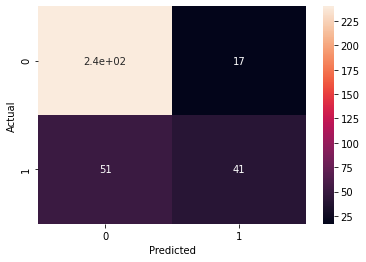

Mildura
Accuracy:  0.9032921810699589


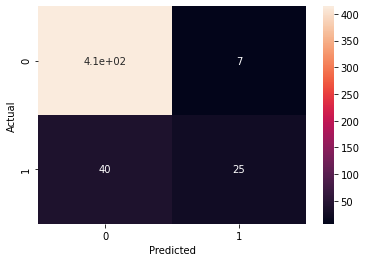

Nhil
Accuracy:  0.8958333333333334


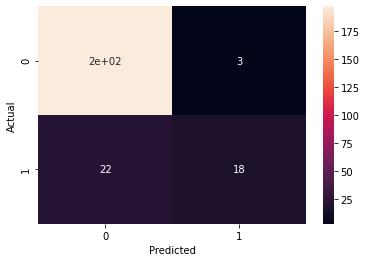

Portland
Accuracy:  0.7804878048780488


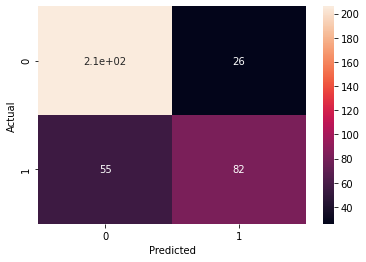

Watsonia
Accuracy:  0.8623376623376623


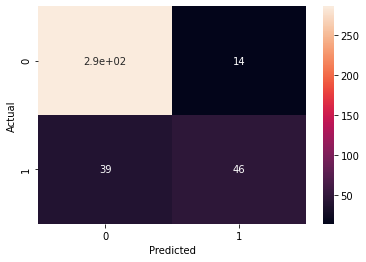

Dartmoor
Accuracy:  0.8597883597883598


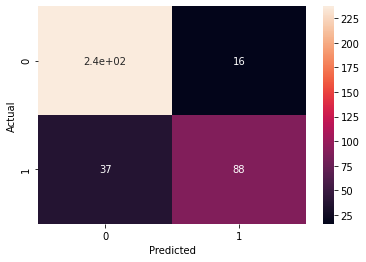

Brisbane
Accuracy:  0.8463203463203464


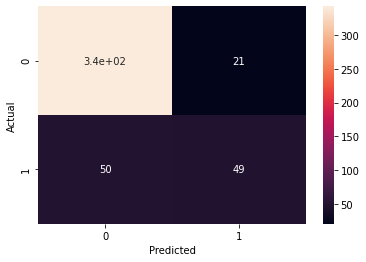

Cairns
Accuracy:  0.8329177057356608


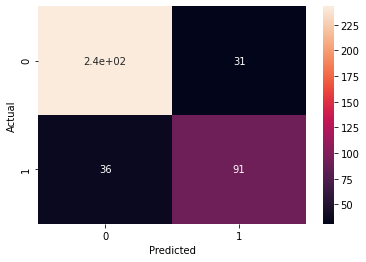

GoldCoast
Accuracy:  0.8735632183908046


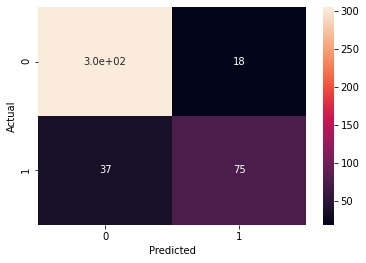

Townsville
Accuracy:  0.8859649122807017


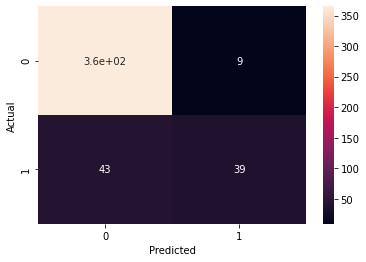

Adelaide
Accuracy:  0.8571428571428571


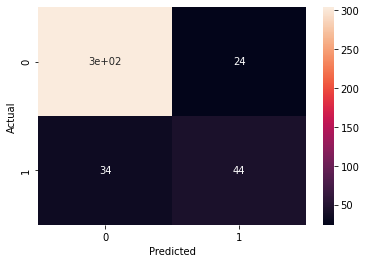

MountGambier
Accuracy:  0.8308823529411765


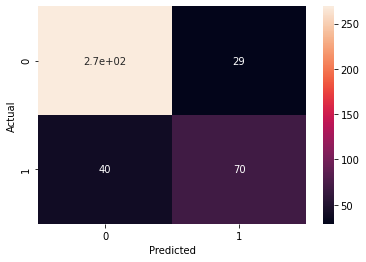

Nuriootpa
Accuracy:  0.8929503916449086


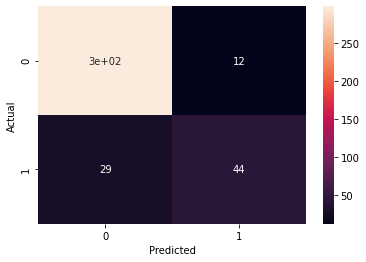

Woomera
Accuracy:  0.9460500963391136


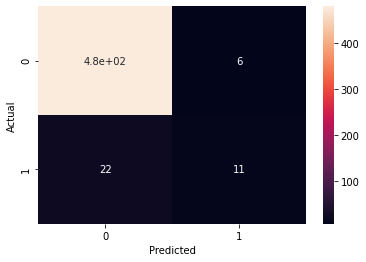

Albany
Accuracy:  0.7664233576642335


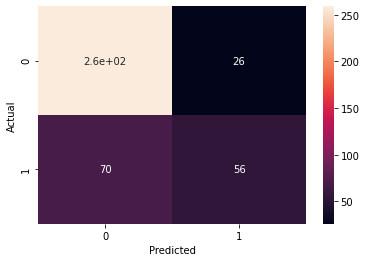

Witchcliffe
Accuracy:  0.8574712643678161


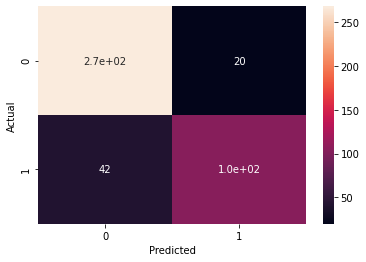

PearceRAAF
Accuracy:  0.8967032967032967


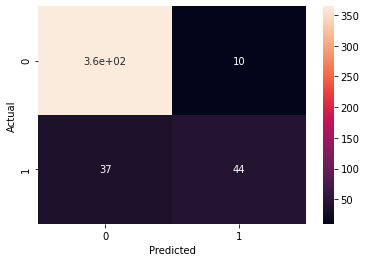

PerthAirport
Accuracy:  0.9040816326530612


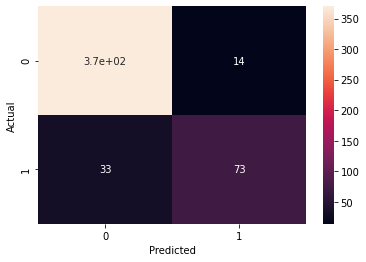

Perth
Accuracy:  0.9056603773584906


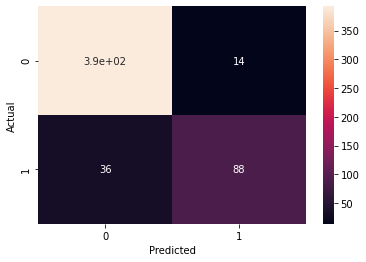

SalmonGums
Accuracy:  0.8623481781376519


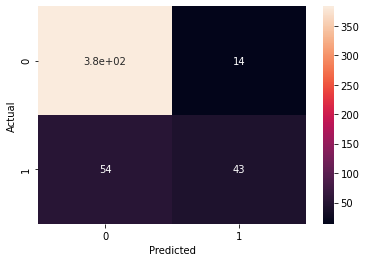

Walpole
Accuracy:  0.8320802005012531


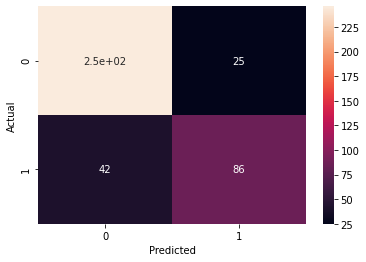

Hobart
Accuracy:  0.7865612648221344


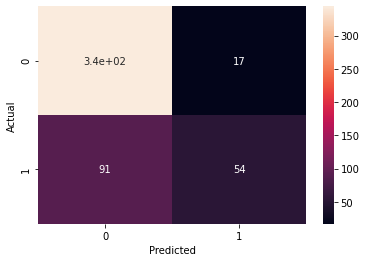

Launceston
Accuracy:  0.8484848484848485


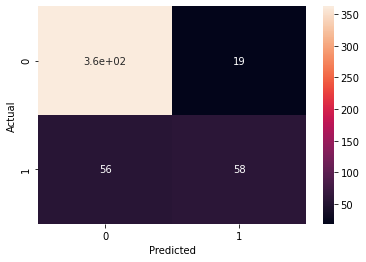

AliceSprings
Accuracy:  0.9377289377289377


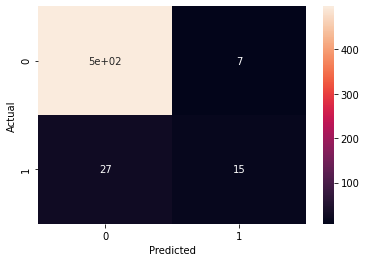

Darwin
Accuracy:  0.83125


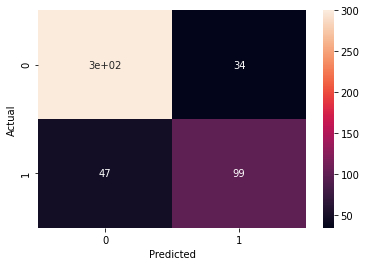

Katherine
Accuracy:  0.8487084870848709


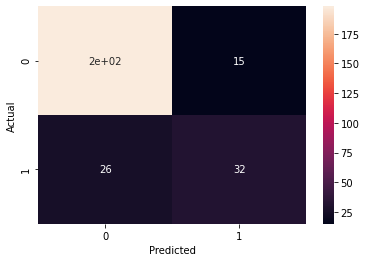

Uluru
Accuracy:  0.9305555555555556


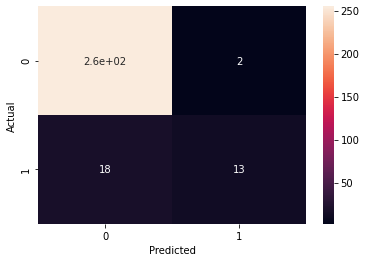

In [284]:
accur = {}
for lokalizacja in lokalizacje:
    raindf_temp = raindf.loc[raindf['Location'] == lokalizacja]
    X = raindf_temp[['MinTemp','MaxTemp','Rainfall',
    'WindGustSpeed',
     'WindSpeed9am',
     'WindSpeed3pm',
     'Humidity9am',
     'Humidity3pm',
     'Pressure9am','Pressure3pm','Temp9am', 'Temp3pm', 'RainToday']]
    
    y = raindf_temp['RainTomorrow']
    
    x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=75)
    
    logistic_regression= LogisticRegression()
    logistic_regression.fit(x_train,y_train)
    y_pred=logistic_regression.predict(x_test)
    
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
    sn.heatmap(confusion_matrix, annot=True)
    
    accur[lokalizacja] = metrics.accuracy_score(y_test, y_pred)
    print(lokalizacja)
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    plt.show()

In [283]:
wyniki_dla_wszystkich = {}
for lokalizacja in lokalizacje:
    raindf_temp = raindf.loc[raindf['Location'] == lokalizacja]
    X_all = raindf[['MinTemp','MaxTemp','Rainfall',
    'WindGustSpeed',
     'WindSpeed9am',
     'WindSpeed3pm',
     'Humidity9am',
     'Humidity3pm',
     'Pressure9am','Pressure3pm','Temp9am', 'Temp3pm', 'RainToday']]
    X = raindf_temp[['MinTemp','MaxTemp','Rainfall',
    'WindGustSpeed',
     'WindSpeed9am',
     'WindSpeed3pm',
     'Humidity9am',
     'Humidity3pm',
     'Pressure9am','Pressure3pm','Temp9am', 'Temp3pm', 'RainToday']]
    
    y = raindf_temp['RainTomorrow']
    y_all = raindf['RainTomorrow']
    
    x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=75)
    x_trainA, x_testA, y_trainA, y_testA = train_test_split(X_all, y_all,test_size=0.2,random_state=75)

    
    logistic_regression= LogisticRegression()
    
    logistic_regression.fit(x_train,y_train)

    y_pred = logistic_regression.predict(x_test)
    y_predA = logistic_regression.predict(x_testA)
    
    print(lokalizacja)
    print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
    print('Accuracy for all locations',metrics.accuracy_score(y_testA, y_predA))
    wyniki_dla_wszystkich[lokalizacja] = metrics.accuracy_score(y_testA, y_predA)


Albury
Accuracy:  0.9434782608695652
Accuracy for all locations 0.8155349150584725
BadgerysCreek
Accuracy:  0.8954248366013072
Accuracy for all locations 0.8363251359545695
Cobar
Accuracy:  0.9195171026156942
Accuracy for all locations 0.8112036190384523
CoffsHarbour
Accuracy:  0.8048192771084337
Accuracy for all locations 0.8122623802877905
Moree
Accuracy:  0.9055793991416309
Accuracy for all locations 0.8128398864237932
Newcastle
Accuracy:  0.7885572139303483
Accuracy for all locations 0.8227537417585061
NorahHead
Accuracy:  0.8033175355450237
Accuracy for all locations 0.8263150295971895
NorfolkIsland
Accuracy:  0.78239608801956
Accuracy for all locations 0.7963809615477164
Penrith
Accuracy:  0.9086651053864169
Accuracy for all locations 0.823860628519178
Richmond
Accuracy:  0.8641686182669789
Accuracy for all locations 0.8315125848212137
Sydney
Accuracy:  0.817351598173516
Accuracy for all locations 0.8244862601665143
SydneyAirport
Accuracy:  0.844559585492228
Accuracy for all loca

Najlepiej przywidujący model według lokalizacji

In [288]:
max(accur.items(), key=operator.itemgetter(1))[0]

'Woomera'

Najlepiej przewidujący model dla wszystkich lokalizacji wyuczony na jednej lokalizacji

In [289]:
max(wyniki_dla_wszystkich.items(), key=operator.itemgetter(1))[0]

'Watsonia'

Z powyższych wynika, że model który ma najlepszą skuteczność dla całego obszaru, nie ma najlepszej skueczności w swoim 

Accuracy:  0.9460500963391136


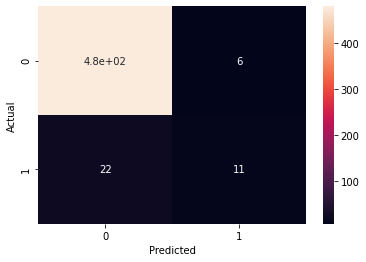

In [291]:
raindf_temp = raindf.loc[raindf['Location'] == 'Woomera']
X = raindf_temp[['MinTemp','MaxTemp','Rainfall',
'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am','Pressure3pm','Temp9am', 'Temp3pm', 'RainToday']]

y = raindf_temp['RainTomorrow']

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=75)

logistic_regression= LogisticRegression()
logistic_regression.fit(x_train,y_train)
y_pred=logistic_regression.predict(x_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

In [293]:
#dominująca wartość w zbiorze 
raindf_temp['RainTomorrow'].value_counts().nlargest(1)

0    2417
Name: RainTomorrow, dtype: int64

In [295]:
raindf_temp['RainTomorrow'].shape

(2591,)

In [296]:
#"klasyfikator będzie przewidywał zawsze brak deszczu (dominująca wartosć w zbiorze)"
y_pred_naiwny = np.zeros(2591)

In [300]:
print('Accuracy for logistic regresion: ',metrics.accuracy_score(y_test, y_pred))
print('Accuracy for dominant value: ',metrics.accuracy_score(y_test, np.zeros(len(y_test))))

Accuracy for logistic regresion:  0.9460500963391136
Accuracy for dominant value:  0.9364161849710982


Wyniki są zbliżone jednak klasyfikator biorący tylko dominujące wartości jest mniej skuteczny